<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/basic_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 텐서를 통한 표현

텐서(tensor)는 여러 형태를가질 수 있는 넘파이 배열(Numpy Array)이다. 텐서는 배열의 차원을 랭크(Rank)로 표현한다.

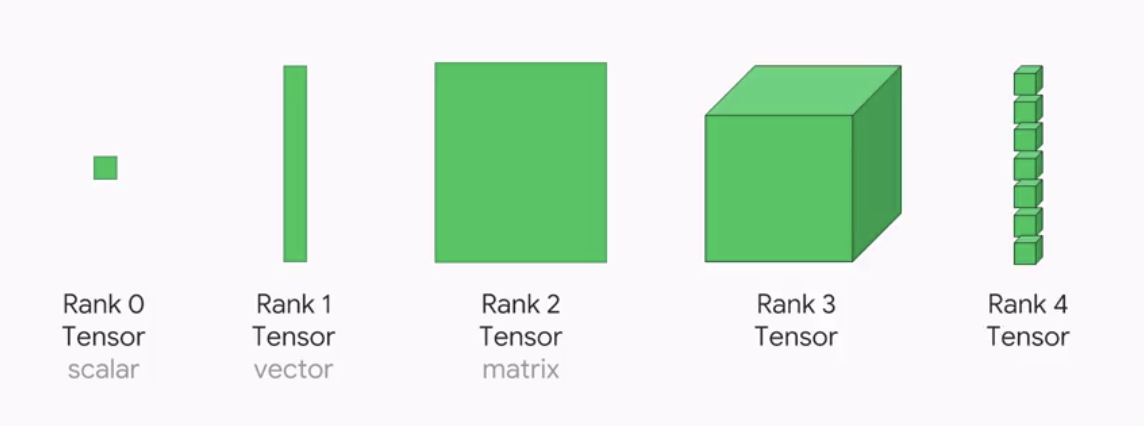

In [2]:
import tensorflow as tf

In [3]:
# 텐서의 차원과 기본 연산
a = tf.constant(2)
print(tf.rank(a))

tf.Tensor(0, shape=(), dtype=int32)


In [4]:
b = tf.constant([1, 2])
print(tf.rank(b))

tf.Tensor(1, shape=(), dtype=int32)


In [7]:
c = tf.constant([[1, 2], [3, 4]])
print(tf.rank(c))

tf.Tensor(2, shape=(), dtype=int32)


# 2. 즉시 실행 모드를 통한 연산

텐서플로 2.x 의 가장 큰 장점 중 하나는 즉시 실행 모드(Eager mode)를 지원한다는 것이다. 이를 통해 텐서플로를 파이썬처럼 사용할 수 있다.

In [8]:
# 필요 모듈을 임포트한다.
import tensorflow as tf
import numpy as np

a = tf.constant(3)
b = tf.constant(2)

# 기본 연산
# 텐서 형태로 출력하기
print(tf.add(a, b)) # 더하기 
print(tf.subtract(a, b)) # 빼기

# 넘파이 배열 형태로 출력하기
print(tf.multiply(a, b).numpy())
print(tf.divide(a, b).numpy())

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
6
1.5


넘파이 배열을 통해 함수를 적용하고 다시 텐서 연산을 수행하는 과정은 다음과 같다.
- numpy() 함수를 사용해 텐서를 넘파이 배열로 변환한다.
- 함수를 적용한다.
- tf.convert_to_tensor() 함수를 사용하여 텐서 형태로 다시 변환한다.

In [10]:
# 텐서에서 넘파이로, 넘파이에서 텐서로
c = tf.add(a, b).numpy() # a, b를 더한 후 Numpy 배열로 변환.
c_square = np.square(c, dtype = np.float32) # Numpy 모듈에 존재하는 square 함수를 적용.
c_tensor = tf.convert_to_tensor(c_square) # 다시 텐서로 변환

# 넘파이 배열과 텐서 각각을 확인하기 위해 출력한다.
print('numpy array : %0.1f, applying square with numpy : %0.1f, convert_to_tensor : %0.1f' % (c, c_square, c_tensor))

numpy array : 5.0, applying square with numpy : 25.0, convert_to_tensor : 25.0


이를 통해 Numpy 모듈이 제공하는 기능뿐만 아니라 정의된 함수를 이용할 수 있다.

텐서플로에서 제공하는 수학에 고나한 계산은 tf.math 모듈에, 선형대수학에 관련된 계산은 tf.linalg 모듈에 있다.

In [11]:
# 수학에 관한 모듈
# from tensorflow.math import sin, cos, tanh
# 선형대수학에 관련된 모듈
# from tensorflow.linalg import diag, svd, matrix_transpose

# 3. @tf.function

@tf.function은 텐서플로에서 자동으로 그래프를 생성(Auto Graph)해주는 기능이다. 이를 통해 파이썬으로 구성된 코드를 고효율의 텐서플로 그래프로 변환하여 사용할 수 있다. GPU 연산을 가능케하기 때문이다. 대표적으로 변환되는 함수는 다음과 같다.

- if -> tf.cond
- for/while -> tf.while_loop
- for _ in dataset -> dataset.reduce

파이썬으로 구성된 함수를 텐서플로 그래프 형태로 다루고 싶을 때 사용하면 좋다.

In [12]:
@tf.function
def square_pos(x):
  if x > 0:
    x = x * x

  else:
    x = x * -1
  return x

print(square_pos(tf.constant(2)))

tf.Tensor(4, shape=(), dtype=int32)


# 4. 신경망


## 1) 퍼셉트론

신경망은 퍼셉트론(Perceptron) 알고리즘으로부터 시작한다. 퍼셉트론 알고리즘은 여러 개의 신호를 받아 하나의 신호를 출력한다.

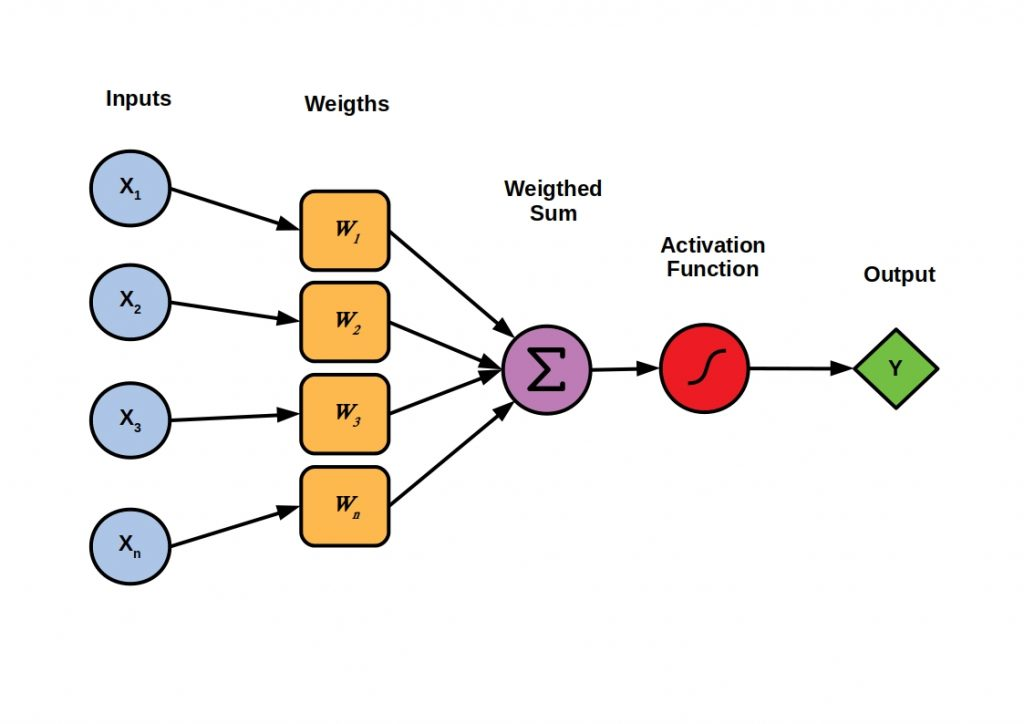

x1, x2는 입력, y는 출력, w는 가중치를 의미한다. 다른 표현으로 x는 데이터의 특성, y는 정답을 나타낸다.

퍼셉트론은 x와 가중치 w를 곱한 값을 모두 더하여 하나의 값(y)으로 만들어 낸다. 이를 임곗값(threshold)와 비교해 크면 1, 그렇지 않으면 0을 출력한다.

```
수식으로 y = { 1 (w1*x1 + w2*x2 > threshold)
           { 0 (w1*x1 + w2*x2 <= threshold)
```
이렇게 신경망에서 만들어진 값을 적절한 출력값으로 변환해주는 함수를 활성화 함수(Activation function)이라 한다. 이러한 과정을 퍼셉트론의 기본 단위이다.


이와 같이 단순히 0과 1을 출력하는 함수를 계단 함수(step function)이라고 한다. 최종 결괏값은 우리가 정해놓은 정답과 비교하게 되는데, 특정 알고리즘을 사용하여 최적값을 찾을 때까지 가중치를 업데이터하면서 학습을 반복하게 될 것이다. 이 과정을 통해 OR 게이트 문제를 해결해본다. 퍼셉트론을 이용하면 AND, NAND 게이트 또한 해결할 수 있다.


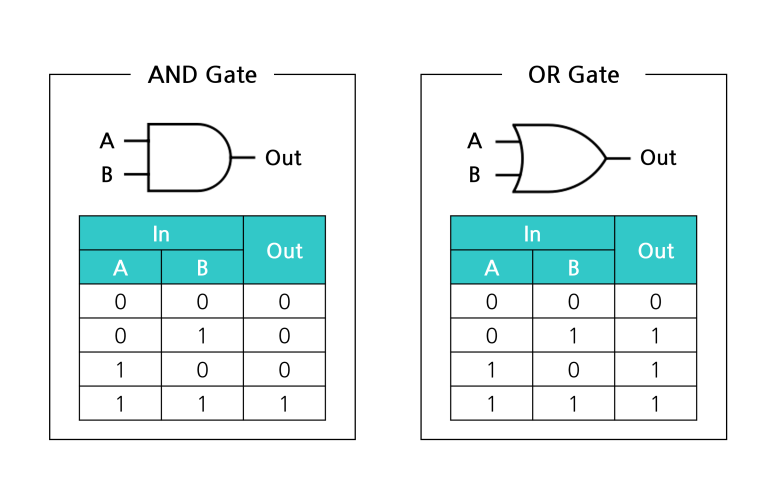

In [13]:
# OR 게이트 구현하기
tf.random.set_seed(777) # 시드를 설정한다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0 ,0], [1, 0], [0, 1], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# 모델 구성하기
model = Sequential()
# 단층 퍼셉트론 구성하기
model.add(Dense(1, input_shape = (2, ), activation='linear'))

# 모델 준비하기
model.compile(optimizer = SGD(),
              loss = mse,
              metrics =['acc']) # list 형태로 평가지표를 전달한다.

# 학습시키기
model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 973ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 12ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 14ms/step - los

이를 통해 OR 게이트 문제를 훌륭하게 해결할 수 있는 모델을 얻게 된다.

동일한 결과를 얻을 수 있는 이유는 tf.random.set_seed()함수 때문이다. 시드를 고정하면 랜덤으로 생성되는 모든 숫자에서 동일한 결과를 얻을 수 있다.

Dense층은 퍼셉트론을 자동으로 생성한다. 밀집층(Dense layer), 다층 퍼셉트론(MLP), 완전 연결층(fully-connected layer) 등 여러 가지 표현이 존재한다.

`Dense(1, input_shape = (2, ))`은 두 개의 특성을 가지는 1차원 데이터를 입력으로 받고, 한 개의 출력을 가지는 Dense층이라고 표현한다. 처음 전달해주는 인자 '1'은 퍼셉트론의 개수를 의미한다. 또는 이를 은닉 유닛(hidden unit)이라고도 표현한다.

위 코드의 Dense층이 위의 그림처럼 구성되었다면, 모델로부터 두 개의 가중치를 얻을 수 있어야 한다. OR 게이트는 데이터당 두 개의 특성(x1, x2)가 있기 때문이다.

In [14]:
# 모델의 가중치 확인하는 방법
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

세 개의 값을 반환하고 있는데, 세 개중 두 개는 가중치에 해당하고, 나머지 한 개는 편향(bias)에 해당한다. 편향은 직선 함수에서 y 절편을 생각하면 이해하기 쉽다.

## 2) 다층 퍼셉트론(MLP; Multi-Layer Perceptron)

다층 퍼셉트론(Multilayer perceptron, MLP)은 퍼셉트론을 여러층 쌓은 순방향의 인공 신경망이다.

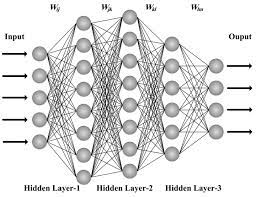

하지만 퍼셉트론에도 한계가 존재한다. XOR 게이트 문제를 해결하지 못한다는 점이다.

XOR(exclusive OR) 게이트는 두 개의 입력 A와 B를 받아 입력 값이 같으면 0을 출력하고, 입력 값이 다르면 1을 출력한다.
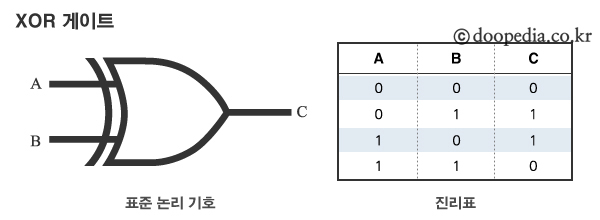

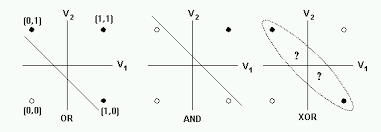

XOR 게이트 그래프에서 한 선으로 검은점과 흰점을 구분할 수가 없다. 선을 더 추가하면 가능할 것 같은데 이때 다층 퍼셉트론을 이용한다.

퍼셉트론에서 모델의 출력값은 '입력값과 가중치를 곱하여 모두 더한 것'이다. 퍼셉트론을 여러 개 쌓게 되면 수많은 가중치를 다루어야 한다. 실제로 사용하는 퍼셉트론은 매우 복잡한데, 이를 단순하고 효율적으로 계산하기 위해 벡터화(vectorization)를 이용하며, 내적을 통해 연산을 수행한다.

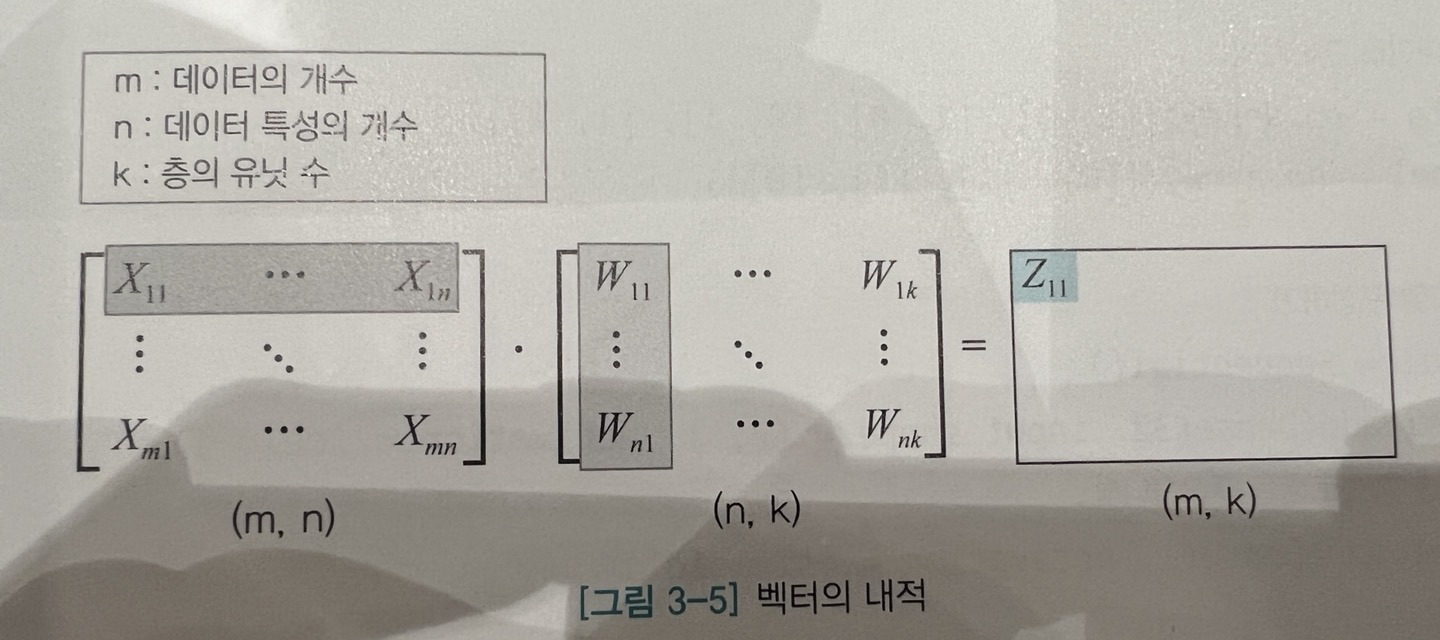

In [16]:
# 벡터의 내적
x = tf.random.uniform((10, 5)) # uniform 분포에서 해당 크기만큼 난수를 생성한다. 10행 5열
w = tf.random.uniform((5, 3))
d = tf.matmul(x, w) # (10, 5) * (5, 3)

print(f'x와 w의 벡터 내적의 결과 크기:{d.shape}')

x와 w의 벡터 내적의 결과 크기:(10, 3)


In [17]:
# XOR 게이트 구현하기. 다층 퍼셉트론
tf.random.set_seed(777) # 시드 설정.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

# 데이터 준비
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
label = np.array([[0], [1], [1], [0]])

# 모델 구성
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation='relu'))
# 다층 퍼셉트론을 구성한다.
model.add(Dense(1, activation='sigmoid'))

# 모델 준비
model.compile(optimizer = RMSprop(),
              loss = mse,
              metrics = ['acc'])

# 학습시키기
model.fit(data, label, epochs =100)

Epoch 1/100
1/1 [==============================] - 1s 820ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - l

첫 번째 Dense층에서 32개의 퍼셉트론을 사용한 걸 알 수 있다. 퍼셉트론을 여러 개 쌓음으로써 XOR 문제를 해결한 것이다.

위의 코드와 또 다른 점은 비선형 활성화 함수를 사용했다는 것이다. (Dense층의 'activation' 인자) 대표적으로 시그모이드(sigmoid), 하이퍼볼릭 탄젠트(tanh), ReLU 활성화 함수가 있다. 